# **Mass-spring systems: damped motion**

---

### **Introduction**

This notebook goes over how to model mass-spring systems with damping with second order linear differential equations.

---

### **Author**
**Junichi Koganemaru**  

---

### **Last Updated**
**January 28, 2025**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## Free damped motion
<div style="text-align: center;">
    <img src="./diagrams/mass-spring.png" alt="Mass-Spring System" style="width: 40%;">
</div>

In this section we are concerned with describing the behavior of a spring-mass system where a resisting force coming from the surrounding medium is present (e.g. air resistance, water resistance, etc.). We assume that the damping force is proportional to the velocity (which is $x'$).  Then by Newton's first law ($ma = m x'' = F$), without any external forces present, the equation is motion is determined by 
$$
mx'' = - k x - \beta x',
$$
where $k > 0$ is the spring constant and $\beta > 0$ is a positive constant that we refer to as the *damping constant*. Here the coefficient in front of the velocity is negative because the damping force is acting in the direction opposite to the motion. Dividing this equation by $m$ and moving all the terms to the left-hand side gives us 
$$
x'' + \frac{\beta}{m} x' + \frac{k}{m} x = 0.
$$
This is a constant coefficient linear equation, so the solutions are related to the characteristic polynomial 
$$
r^2 + \frac{\beta}{m} r+ \frac{k}{m} = 0.
$$
For algebraic convenience let us define 
$$
\lambda := \frac{1}{2} \frac{\beta}{m}, \quad \omega := \sqrt{ \frac{k}{m} }.
$$
Then the roots of the characteristic polynomial are given by the quadratic formula, 
$$
r = \frac{-2\lambda \pm \sqrt{4\lambda^2 - 4 \omega^2}}{2} = -\lambda \pm \sqrt{\lambda^2 - \omega^2}. 
$$
$\omega$ is referred to as the *angular frequency* of the system.

Since the solution depends on the sign of $\lambda^2 - \omega^2$ we consider three cases. 

### Case 1: $\lambda^2 - \omega^2 > 0$
In this case we say that the system is *overdamped*. Since the roots of the characteristic polynomial are real, the solution is given by 
$$
x(t) = e^{-\lambda t} ( c_1 e^{-\sqrt{\lambda^2 - \omega^2 } t} + c_2 e^{\sqrt{ \lambda^2 - \omega^2} t } )
$$

### Case 2: $\lambda^2 - \omega^2 = 0$
In this case we say that the system is *critically damped*. With a double root of $-\lambda$ the solution is given by 
$$
x(t) = e^{-\lambda t} ( c_1 + c_2 t).
$$

### Case 3: $\lambda^2 - \omega^2 < 0$
In this case we say that the system is *underdamped*. In this case we have complex roots and thus the solution is given by 
$$
x(t) = e^{-\lambda t} ( c_1 \cos( \sqrt{\omega^2  - \lambda^2} t ) + c_2 \sin( \sqrt{\omega^2  - \lambda^2} t) ).
$$

**Remark**: Notice that in all three cases the presence of exponential $e^{-\lambda t}$ ensures $x(t) \to 0$ as $t \to \infty$.

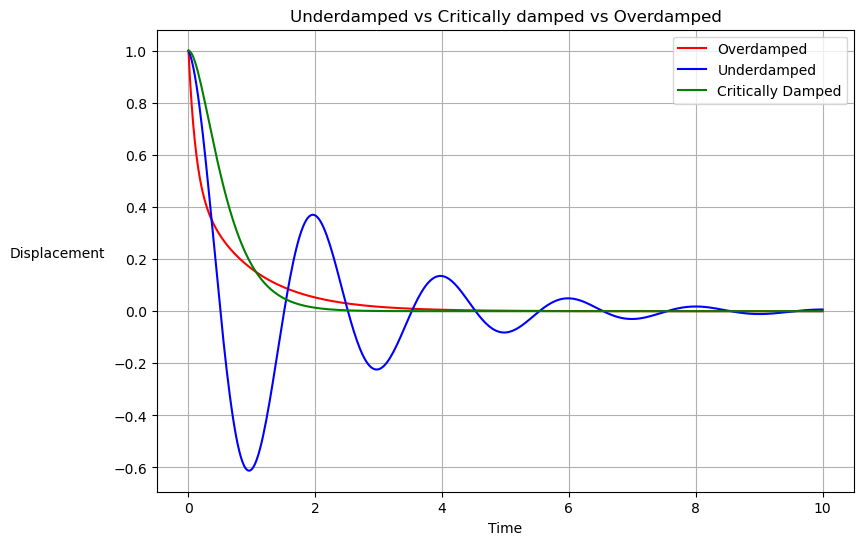

In [10]:
t = np.linspace(0, 10, 400)

m = 1 
k = 10  

beta_overdamped = 10
beta_underdamped = 1
beta_critically_damped = 2 * np.sqrt(k * m)

omega = np.sqrt(k / m)

lambda_overdamped = beta_overdamped / (2 * m)
x_overdamped = np.exp(-lambda_overdamped * t) * (np.cosh(np.sqrt(lambda_overdamped**2 - omega**2) * t))

lambda_underdamped = beta_underdamped / (2 * m)
x_underdamped = np.exp(-lambda_underdamped * t) * np.cos(np.sqrt(omega**2 - lambda_underdamped**2) * t)

lambda_critically_damped = beta_critically_damped / (2 * m)
x_critically_damped = np.exp(-lambda_critically_damped * t) * (1 + lambda_critically_damped * t)

plt.figure(figsize=(9, 6))

plt.plot(t, x_overdamped, label='Overdamped', color='r')
plt.plot(t, x_underdamped, label='Underdamped', color='b')
plt.plot(t, x_critically_damped, label='Critically Damped', color='g')

plt.title('Underdamped vs Critically damped vs Overdamped')
plt.xlabel('Time')
plt.ylabel('Displacement', rotation = 0, labelpad = 40)
plt.legend()
plt.grid(True)
plt.show()

See [this video](https://www.youtube.com/watch?v=sP1DzhT8Vzo) for a nice visual explanation of the three cases.

Here is [another video](https://www.youtube.com/watch?v=99ZE2RGwqSM) demonstrating the same type of phenomena for pendulums.

### An alternative form of $x(\cdot)$ in underdamped systems
Below is a typical graph of $x$ in an underdamped system.

<div style="text-align: center;">
    <img src="./diagrams/underdamped.png" alt="Underdamped" style="width: 40%;">
</div>

Recall that $x: \mathbb{R} \to \mathbb{R}$ is given by 
$$
x(t) = e^{-\lambda t} ( c_1 \cos( \sqrt{\omega^2 - \lambda^2 } t ) + c_2 \sin( \sqrt{\omega^2 - \lambda^2 }t) ).
$$
It is often more convenient to rewrite $x$ as
$$
x(t) = A e^{-\lambda t} \sin( \sqrt{\omega^2 - \lambda^2} t+ \phi), \; t \in \R, \phi \in [0,2\pi],
$$
and $A = \sqrt{c_1^2 + c_2^2}$ is the amplitude of the system without damping. With the presence of the damping term $e^{-\lambda t}$ the *damped amplitude* of the system is given by $A e^{-\lambda t}$.

To determine $\phi$ we expand  
$$
x(t) = A e^{-\lambda t} ( \sin(  \sqrt{\omega^2 - \lambda^2} t) \cos(\phi) + \cos( \sqrt{\omega^2 - \lambda^2} t) \sin(\phi) ) 
$$
and compare it to the original equation; we see that we must have 
$$
\sin(\phi) = \frac{c_1}{A}, \cos(\phi) = \frac{c_2}{A} \implies \tan \phi = \frac{c_1}{c_2}.
$$
$\phi$ is referred to as the *phase angle*. Note that the principal branch of the inverse tangent function only gives values between $-\pi/2$ and $\pi/2$. Since the phase angle is defined to be an angle between $0$ and $2\pi$, we have  
$$
     \phi = \begin{cases}
         \tan^{-1} \frac{c_1}{c_2}, &c_1 , c_2 > 0\\
         \pi + \tan^{-1} \frac{c_1}{c_2}, & c_2 < 0 \\
         2\pi + \tan^{-1} \frac{c_1}{c_2}, & c_2 > 0, c_1 < 0.
     \end{cases}
$$

Note very carefully that $x$ is *not a periodic function* even if it resembles one and the system is oscillating. For this reason $T = \frac{2\pi}{\sqrt{w^2 - \lambda^2}}$ is often referred to as the *quasi-period* measuring the time interval between two successive maxima of $x(t)$, and $f = \frac{1}{T}$ is the *quasi-frequency*. 


### More examples

> **Example (Logarithmic decrement)**: An underdamped system
> 
> Consider the system determined by 
> $$
> x(t)'' + 2 x(t)' + 10 x(t)= 0, \; t \in \mathbb{R}.
> $$
> The characteristic polynomial is given by $r^2 + 2r + 10 = 0 \implies r = \frac{-2 \pm \sqrt{4 - 40}}{2} = -1 \pm 3i$. Therefore the system is underdamped and the solution $x: \mathbb{R} \to \mathbb{R}$ is given by
> $$
> x(t) = e^{-t}  (c_1 \cos(3t) + c_2 \sin(3t) ).
> $$
> 
> What we would like to do now is to calculate the time between successive maxima.
> 
> <div style="text-align: center;">
>     <img src="./diagrams/successive-maxima.png" alt="maxima" style="width: 40%;">
> </div>
> 
> First we rewrite $x(t)$ in the form
> $$
> x(t) = A e^{-t} \sin( 3t + \phi)
> $$
> where $A = \sqrt{c_1^2 + c_2^2}$ and $\phi$ can be found through the equation $\tan \phi =  c_1 / c_2 $. 
> 
> The extremum of $x$ occurs when 
> $$
>  x'(t) = A e^{-t} (  3\cos(3t+ \phi)  - \sin(3t + \phi) ) = 0 \Longleftrightarrow 3 \cos(3t + \phi) = \sin(3t + \phi) \Longleftrightarrow \tan(3t + \phi) = 3.
> $$
> Thus $x'(t) = 0$ whenever 
> $$
> t = \frac{ \tan^{-1}(3) - \phi}{3} + \frac{\pi}{3} k
> $$
> where $k$ is an integer. This implies that the successive extremum of $x$ are $\frac{\pi}{3}$ apart. 
> 
> By analyzing the intersections of the functions $3 \cos(3t+\phi)$ and $\sin(3t + \phi)$ we can see that $x'$ changes signs between its zeros, which implies that the extrema of $x$ alternate from maxima to minima to maxima continuing ad infinitum. Therefore the successive maxima of $x$ are $\frac{2\pi}{3}:= T_d$ apart.  
> 
> Notice that if $(t, x(t))$ is a local maximum then we have
> $$
> \frac{x(t)}{x(t + \frac{2\pi}{3} )}= \frac{A e^{-t} \sin( 3t + \phi)} {A e^{-(t+ \frac{2\pi}{3})} \sin(3(t+\frac{2\pi}{3}) + \phi)}= e^{\frac{2\pi}{3}}
> $$
> since 
> $$
>  \sin \left(3(t+\frac{2\pi}{3}) \right)= \sin( 3t + \phi + 2\pi ) = \sin(3t + \phi),
> $$
> therefore the ratio between two successive displacements is constant. Notice that in this particular problem we have $\lambda = 1$ and $\mu = \sqrt{\omega^2 - \lambda^2} = 3$. In general this ratio is given by $e^{2 \pi \lambda/ \mu}$ and the log of this ratio  
> $$
> \log e^{\frac{2\pi\lambda}{\mu}} = \frac{2\pi \lambda }{\mu} = \frac{2\pi}{\mu} \cdot \frac{\beta}{2m} = \frac{\pi \beta}{m \mu}
> $$
> is referred to as the [*logarithmic decrement*](https://en.wikipedia.org/wiki/Logarithmic_decrement). 

In practice, the damping constant associated to a system is sometimes unknown. In this case, one can run experiments to measure the logarithmic decrement, and use it to determine the damping constant.

> **Example (The energy of a damped system)**:
> Consider a damped system given by 
> $$
>  m x'' + \beta  x' + k x = 0
> $$
> and define the total energy $E: \mathbb{R} \to \mathbb{R}$ of the system via 
> $$
> E(t) = \underbrace{\frac{1}{2} m (x'(t))^2}_{\text{kinetic energy}} + \underbrace{ \frac{1}{2} k x(t)^2}_{\text{potential energy}}
> $$
> Then 
> $$
> \frac{d E(t)}{dt} = m x'(t) x''(t) + k x(t) x'(t) = x'(t) (\underbrace{m x''(t) + k x(t)}_{\text{using the ODE}} ) = x'(t) ( - \beta x'(t) ) = - \beta (x'(t) )^2 < 0, \; t \in \mathbb{R}.
> $$
> This shows that the total energy of the system is always decreasing in a damped system. If $\beta = 0$ (i.e. the system is undamped), then the above calculation shows that the energy is conserved. 